In [9]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

In [10]:
pd.set_option('display.max_columns', None)
kaggle_df = pd.read_csv('fetal_health.csv');
CTU_df = pd.read_csv('../CTU-CHB/waveform_data.csv')

In [11]:
kaggle_df = kaggle_df[['baseline value', 'accelerations', 'light_decelerations',\
        'prolongued_decelerations', 'abnormal_short_term_variability',\
        'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability',\
        'mean_value_of_long_term_variability', 'fetal_health']]

kaggle_df = kaggle_df.rename(columns={'light_decelerations':'decelerations'})

In [12]:
CTU_df
CTU_df = CTU_df.rename(columns={'percent_of_time_with_long_term_variability':'percentage_of_time_with_abnormal_long_term_variability'})

In [13]:
X = kaggle_df.iloc[:, :-1]
y = kaggle_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
model_dt = DecisionTreeClassifier()
model_nb = GaussianNB()
model_rf = RandomForestClassifier(n_estimators=200)
model_gb = GradientBoostingClassifier()
model_knn = KNeighborsClassifier(2)
models = [model_dt, model_nb, model_rf, model_gb, model_knn]

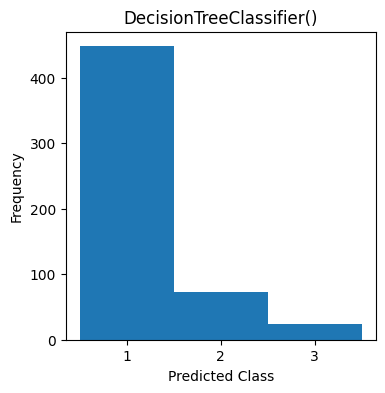

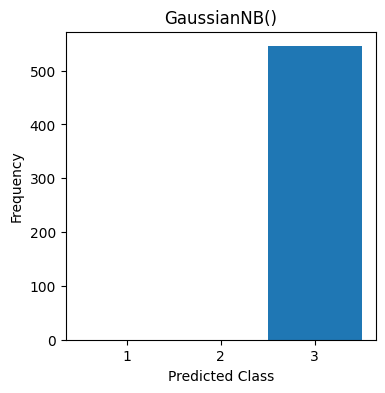

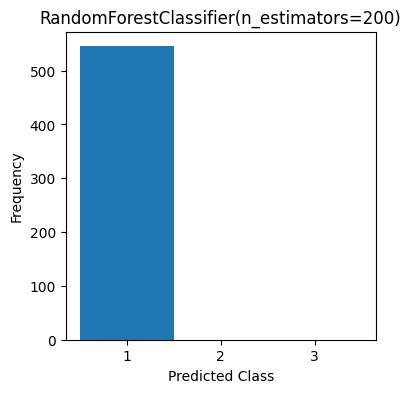

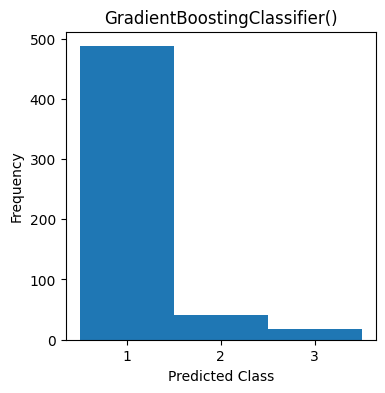

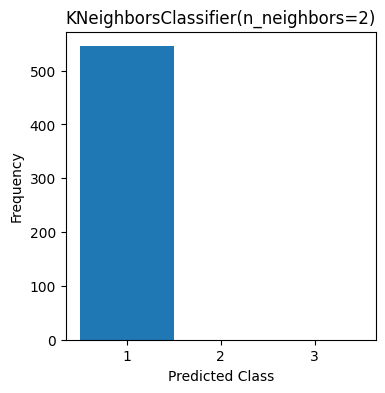

In [21]:
for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(CTU_df)
    plt.figure(figsize=(4, 4))
    bins = np.arange(0.5, 4.5, 1)  
    plt.hist(pred, bins=bins)
    plt.title(model)
    plt.xlabel("Predicted Class")
    plt.ylabel("Frequency")
    plt.xticks(np.arange(1, 4, 1))
    plt.show()